<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/10%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U imbalanced-learn

In [2]:
import imblearn

In [3]:
dir(imblearn)

['FunctionSampler',
 'LazyLoader',
 '__IMBLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'combine',
 'ensemble',
 'exceptions',
 'importlib',
 'keras',
 'metrics',
 'over_sampling',
 'pipeline',
 'show_versions',
 'sys',
 'tensorflow',
 'types',
 'under_sampling',
 'utils']

In [4]:
from sklearn.datasets import make_classification

In [5]:
data = make_classification(5000, 2, n_redundant=0, weights=[0.01, 0.99])

In [6]:
import numpy as np

In [7]:
np.unique(data[1], return_counts=True)

(array([0, 1]), array([  78, 4922]))

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
ros = RandomOverSampler()

In [10]:
result = ros.fit_resample(data[0], data[1])

In [11]:
result[0]

array([[-0.10374927,  0.70871072],
       [ 0.45482095,  1.85261606],
       [-0.55255258,  0.57198484],
       ...,
       [-3.01390299, -2.93362326],
       [-2.15267602, -1.45312655],
       [-1.36794948, -2.02582865]])

In [12]:
result[1]

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
np.unique(result[1], return_counts=True)

(array([0, 1]), array([4922, 4922]))

In [14]:
import pandas as pd

In [15]:
result

(array([[-0.10374927,  0.70871072],
        [ 0.45482095,  1.85261606],
        [-0.55255258,  0.57198484],
        ...,
        [-3.01390299, -2.93362326],
        [-2.15267602, -1.45312655],
        [-1.36794948, -2.02582865]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [16]:
pd.DataFrame(result[0]).duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9839     True
9840     True
9841     True
9842     True
9843     True
Length: 9844, dtype: bool

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
ru = RandomUnderSampler()

In [19]:
result = ru.fit_resample(data[0], data[1])

In [20]:
result[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## duplicated(중복) 없음  원래 샘플에서 유사하게 만드는 기법

In [21]:
from imblearn.over_sampling import SMOTE, ADASYN

In [22]:
smote = SMOTE()

In [23]:
result = smote.fit_resample(data[0], data[1])

In [24]:
pd.DataFrame(result[0]).duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9839    False
9840    False
9841    False
9842    False
9843    False
Length: 9844, dtype: bool

In [25]:
pd.DataFrame(result[0]).duplicated().sum()

0

In [26]:
np.unique(result[1], return_counts=True)

(array([0, 1]), array([4922, 4922]))

# impute 데이터 (가짜데이터) => 성능은 떨어지지만 대안기법으로

In [29]:
import seaborn as sns

In [30]:
titanic = sns.load_dataset('titanic')

### info !!!!!!

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#curse of dimention(차원의 저주) => column에 비해 row가 너무 적을 때 =>
learning curve
overfitting 해결 방법
 - feature selection (filter, wrapper, embeded)
 - dimension reduction(아직 안함=>unsupervied learning)
 - regulizer (penalty -L1 L2)
 - ensemble (bagging ... )

# y = target = class
- supervised / unsupervised
- classification / regression
- distribution
  : binary  
  : multiclass(ovo, ovr)
- imbalanced
  : sampling

# impute  (missing data)
- pipeline(columntransformer) - GridSearch (이미 배움) ,  그외는 고급반

# data type
- EDA
- describe / boxplot
- preprocessing

# memory usage (메모리보다 크면 해결 방법 라이브러리 dask)
  =>  판다스는 하나의 메모리상에 올려야 하기 때문에 데이터가 너무 크면 단점

In [43]:
titanic.describe(include=['float64'])

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<Axes: >

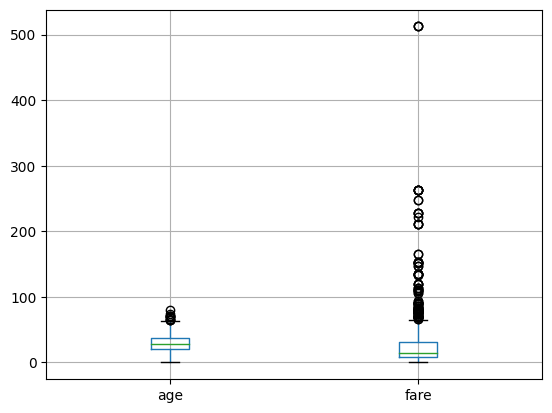

In [45]:
titanic.select_dtypes('float64').boxplot()

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
from sklearn.experimental import enable_halving_search_cv

In [38]:
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

In [ ]:
#!pip install -U scikit-optimize

In [41]:
#from skopt import gp_minimize

In [42]:
from skopt import BayesSearchCV

In [32]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

<Axes: ylabel='survived'>

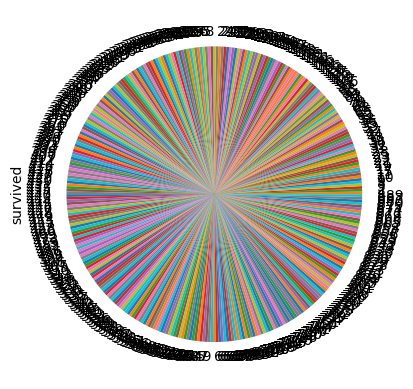

In [33]:
titanic.survived.plot.pie()

<Axes: xlabel='survived', ylabel='Count'>

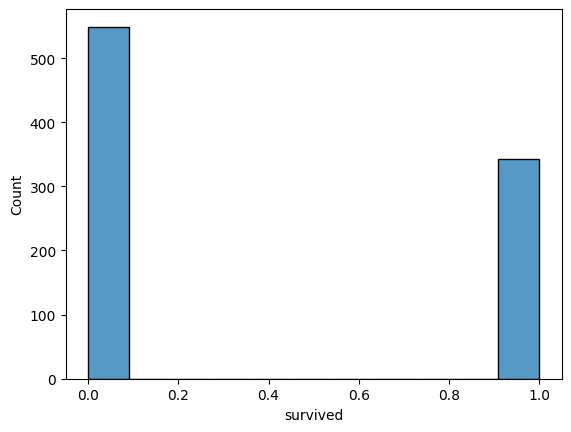

In [34]:
sns.histplot(titanic, x='survived')